DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

 

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

 

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [5]:
# The dataset has 9578 rows and 14 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
print(df["not.fully.paid"].value_counts())
print(df["not.fully.paid"].value_counts(normalize='True'))

0    8045
1    1533
Name: not.fully.paid, dtype: int64
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64


In [8]:
# 84 percent is not default and 16 percent is default. 
# This dataset is higly imbalanced. 
# In a highly imbaanced dataset, accuracy is not a true indicator of how the model is performing. 
# Even a worst model will have accuracy of 84% because 84% is majority class. 
# If all the datapoints in minority class are mis-classified, the model will still have an accuracy of 84%.
# This is not a true indicator. We need to check the F1 score, Precision and Recall to find how well the model is performing.

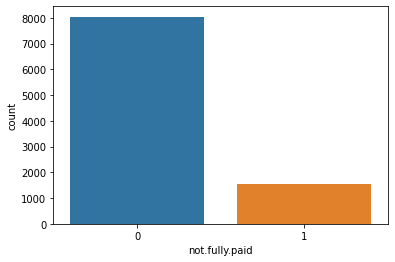

In [9]:
sns.countplot(x='not.fully.paid',data=df)


In [10]:
# all of the 14 columns dont have any null values


In [11]:
corr_matrix = df.corr().abs()
corr_matrix

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.294089,0.058770,0.034906,0.090901,0.348319,0.099026,0.187518,0.104095,0.535511,0.076318,0.054243,0.158119
int.rate,0.294089,1.000000,0.276140,0.056383,0.220006,0.714821,0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,0.010419,0.004368,0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,0.033439
dti,0.090901,0.220006,0.050202,0.054065,1.000000,0.241191,0.060101,0.188748,0.337109,0.029189,0.021792,0.006209,0.037362
fico,0.348319,0.714821,0.086039,0.114576,0.241191,1.000000,0.263880,0.015553,0.541289,0.185293,0.216340,0.147592,0.149666
days.with.cr.line,0.099026,0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,0.024239,0.041736,0.081374,0.071826,0.029237
revol.bal,0.187518,0.092527,0.233625,0.372140,0.188748,0.015553,0.229344,1.000000,0.203779,0.022394,0.033243,0.031010,0.053699
revol.util,0.104095,0.464837,0.081356,0.054881,0.337109,0.541289,0.024239,0.203779,1.000000,0.013880,0.042740,0.066717,0.082088
inq.last.6mths,0.535511,0.202780,0.010419,0.029171,0.029189,0.185293,0.041736,0.022394,0.013880,1.000000,0.021245,0.072673,0.149452


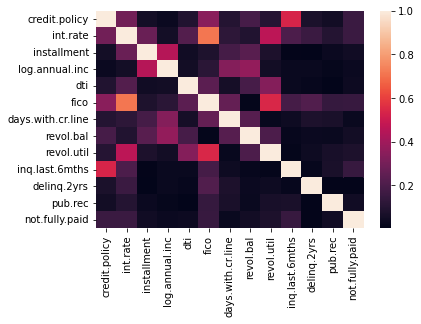

In [12]:
sns.heatmap(corr_matrix)

In [13]:
# fico and int.rate seem to be highly correlated with a correlation of 0.714821. Lets drop fico column
df = df.drop("fico",axis=1)


In [14]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,1800.000000,0,3.2,5,0,0,1


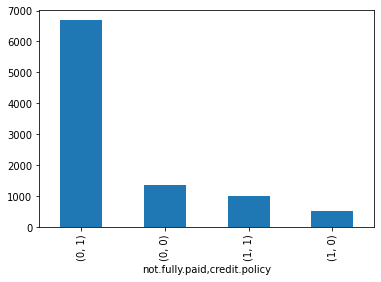

In [15]:
df.groupby('not.fully.paid')['credit.policy'].value_counts().plot(kind = 'bar')

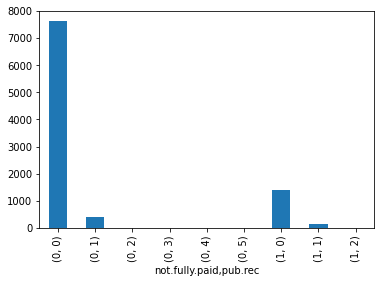

In [16]:
df.groupby('not.fully.paid')['pub.rec'].value_counts().plot(kind = 'bar')

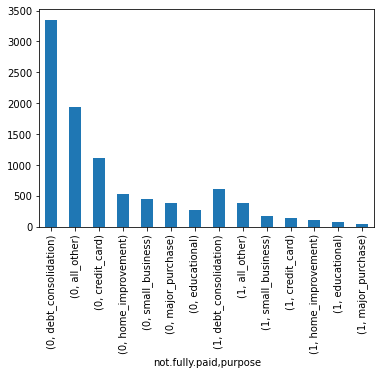

In [17]:
df.groupby('not.fully.paid')['purpose'].value_counts().plot(kind = 'bar',)

In [18]:
# Convert all categorical columns to numeric.
from sklearn.preprocessing import LabelEncoder
df["purpose"] = LabelEncoder().fit_transform(df["purpose"])

In [19]:
df["purpose"].value_counts()

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

In [20]:
df["purpose"]

0       2
1       1
2       2
3       2
4       1
       ..
9573    0
9574    0
9575    2
9576    4
9577    2
Name: purpose, Length: 9578, dtype: int64

In [21]:
df["not.fully.paid"]

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
 12  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 972.9 KB


In [23]:
# Define X and y variables
# First 12 variables are taken as X.
X = df.iloc[:,0:12].values
print(X.shape)
print(X.dtype)
print(X)

(9578, 12)
float64
[[1.     2.     0.1189 ... 0.     0.     0.    ]
 [1.     1.     0.1071 ... 0.     0.     0.    ]
 [1.     2.     0.1357 ... 1.     0.     0.    ]
 ...
 [0.     2.     0.1071 ... 8.     0.     0.    ]
 [0.     4.     0.16   ... 5.     0.     0.    ]
 [0.     2.     0.1392 ... 6.     0.     0.    ]]


In [24]:
# The last column is taken as y varaible.
y = df.iloc[:,12].values 
print(y.shape)
print(y.dtype)
print(y)



(9578,)
int64
[0 0 0 ... 1 1 1]


In [25]:
# Scale the X variables so they are all in same scale. Neural networks work well when the inputs have values between 0 and 1. 
#That is because the weights are also between 0 and 1. If the inputs have a large value, the model takes a long time to converge.
# StandardScaler subtracts all values by the mean and divide them by std deviation. So, the result has unit variance. 
# StdScaler is immune to outliers.
from sklearn.preprocessing import StandardScaler
stdscl = StandardScaler()
X_scaled = stdscl.fit_transform(X)
print(X_scaled)


[[ 0.49222226  0.03317632 -0.13931753 ... -0.71698894 -0.29973008
  -0.23700318]
 [ 0.49222226 -0.55966463 -0.57886837 ... -0.71698894 -0.29973008
  -0.23700318]
 [ 0.49222226  0.03317632  0.48648368 ... -0.26247044 -0.29973008
  -0.23700318]
 ...
 [-2.03160257  0.03317632 -0.57886837 ...  2.91915909 -0.29973008
  -0.23700318]
 [-2.03160257  1.2188582   1.39166043 ...  1.55560358 -0.29973008
  -0.23700318]
 [-2.03160257  0.03317632  0.61685894 ...  2.01012208 -0.29973008
  -0.23700318]]


In [26]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.8, random_state = 10, stratify=y)


In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(7662, 12)
(7662,)
(1916, 12)
(1916,)


In [28]:
# model Architecture

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=20, activation='relu', input_shape = (12,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=20, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
mdl_history = model.fit(X_train, y_train, epochs=100, shuffle = True, validation_split = .25)


Epoch 1/100
180/180 [==============================] - 3s 8ms/step - loss: 0.5288 - accuracy: 0.7943 - val_loss: 0.4361 - val_accuracy: 0.8439
Epoch 2/100
180/180 [==============================] - 1s 7ms/step - loss: 0.4455 - accuracy: 0.8383 - val_loss: 0.4210 - val_accuracy: 0.8439
Epoch 3/100
180/180 [==============================] - 1s 6ms/step - loss: 0.4387 - accuracy: 0.8381 - val_loss: 0.4162 - val_accuracy: 0.8439
Epoch 4/100
180/180 [==============================] - 1s 5ms/step - loss: 0.4256 - accuracy: 0.8394 - val_loss: 0.4141 - val_accuracy: 0.8439
Epoch 5/100
180/180 [==============================] - 1s 7ms/step - loss: 0.4278 - accuracy: 0.8380 - val_loss: 0.4136 - val_accuracy: 0.8439
Epoch 6/100
180/180 [==============================] - 1s 7ms/step - loss: 0.4240 - accuracy: 0.8376 - val_loss: 0.4100 - val_accuracy: 0.8439
Epoch 7/100
180/180 [==============================] - 1s 8ms/step - loss: 0.4251 - accuracy: 0.8381 - val_loss: 0.4088 - val_accuracy: 0.8439

In [29]:
history = mdl_history.history

In [30]:
# Plot the train and validation accuracy.
# Also plot the train and validation error.
def plot_history(history):
  fig, axs = plt.subplots(2)

  axs[0].plot(history['accuracy'], label="train accuracy")
  axs[0].plot(history['val_accuracy'], label = "test accuracy")
  axs[0].set_ylabel('Accuracy')
  axs[0].legend(loc='lower right')

  axs[1].plot(history['loss'], label = "train error")
  axs[1].plot(history['val_loss'], label = "test error")
  axs[1].set_ylabel('Epoch')
  axs[1].set_xlabel('Error')
  axs[1].legend(loc='lower right')
  plt.show()
  


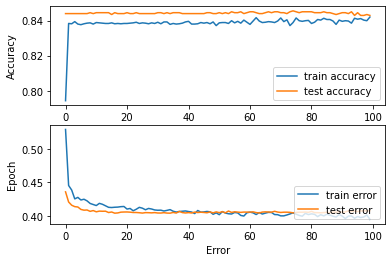

In [31]:
plot_history(history)

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred = np.round(y_pred)
y_pred


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [34]:
# print y_test - the actual values
y_test


array([0, 1, 0, ..., 0, 0, 0])

In [35]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[1601    8]
 [ 305    2]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.20      0.01      0.01       307

    accuracy                           0.84      1916
   macro avg       0.52      0.50      0.46      1916
weighted avg       0.74      0.84      0.77      1916



Above, though accuracy is 84 percent, the recall and f1 score for minority class is very low, which is very bad. The model could only predict 1 datapoint correctly in the minority class. 
This is because of highly imbalanced data. We will try to fix this problem.

We will use SMOTE (Synthetic Minority Oversampling Technique) to fix this problem of imbalanced data.

In [36]:
print("y train majority and minority classes", np.unique(y_train, return_counts=True))

print("X_train",X_train.shape)

print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
print(X_train[0])

print(X_test[0])

y train majority and minority classes (array([0, 1]), array([6436, 1226]))
X_train (7662, 12)
y_train (7662,)
X_test (1916, 12)
y_test (1916,)
[ 0.49222226 -1.15250557 -0.75021871 -0.60262299 -0.7170735   0.33315674
  1.7307251   0.02936018  0.31712664 -0.71698894 -0.29973008 -0.23700318]
[ 0.49222226 -0.55966463  0.33375839  0.18777405 -0.46633256  0.99995801
 -0.43287762  0.41342832  0.45844308 -0.71698894 -0.29973008 -0.23700318]


In [37]:
# Use SMOTE to fix the problem of imbalanced data.
# SMOTE uses k-nearest neighbours to generate more samples (over sampling) for the minority class. 

# Split the values into training and validation subsets
X_valid, X_train = X_train[:100], X_train[100:] 
y_valid, y_train = y_train[:100], y_train[100:]

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_valid",X_valid.shape)
print("y_valid",y_valid.shape)

from imblearn.over_sampling import SMOTE 
sm = SMOTE(sampling_strategy="minority")
X_sm, y_sm = sm.fit_resample(X_train,y_train)
print("y_sm",np.unique(y_sm,return_counts=True))


X_valid_sm, y_valid_sm = sm.fit_resample(X_valid,y_valid)
print("y_valid_sm",np.unique(y_valid_sm,return_counts=True))


X_train (7562, 12)
y_train (7562,)
X_valid (100, 12)
y_valid (100,)
y_sm (array([0, 1]), array([6355, 6355]))
y_valid_sm (array([0, 1]), array([81, 81]))


In [38]:
# In the above cell, notice that after oversampling, both classes(0 and1) are balanced for y_sm and y_valid_sm. 
# Now the dataset is balanced. We can train our model on this dataset.

In [40]:

# model Architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=5, activation='relu', input_shape = (12,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=5, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=5, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
mdl_history = model.fit(X_sm, y_sm, epochs=100, validation_data=(X_valid_sm,y_valid_sm))


Epoch 1/100
398/398 [==============================] - 4s 6ms/step - loss: 0.6940 - accuracy: 0.5353 - val_loss: 0.7028 - val_accuracy: 0.4506
Epoch 2/100
398/398 [==============================] - 2s 5ms/step - loss: 0.6823 - accuracy: 0.5588 - val_loss: 0.6997 - val_accuracy: 0.4753
Epoch 3/100
398/398 [==============================] - 2s 5ms/step - loss: 0.6754 - accuracy: 0.5682 - val_loss: 0.7014 - val_accuracy: 0.5000
Epoch 4/100
398/398 [==============================] - 2s 4ms/step - loss: 0.6701 - accuracy: 0.5725 - val_loss: 0.6969 - val_accuracy: 0.4938
Epoch 5/100
398/398 [==============================] - 1s 3ms/step - loss: 0.6677 - accuracy: 0.5748 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 6/100
398/398 [==============================] - 1s 4ms/step - loss: 0.6617 - accuracy: 0.5888 - val_loss: 0.6976 - val_accuracy: 0.4815
Epoch 7/100
398/398 [==============================] - 2s 5ms/step - loss: 0.6613 - accuracy: 0.5881 - val_loss: 0.6957 - val_accuracy: 0.5123

In [41]:
# Notice that accuracy has gone down after over sampling and retraining the model. 
# That's because the oversampling using SMOTE technique puts more weight to the minority class, makes the model bias to it.
# The model will now predict the minority class with higher accuracy but the overall accuracy will decrease.

# But accuracy is not a good indicator of the model performance. So we will look into F1score, precision and recall to see how the model performs.

In [42]:

y_pred_probs = model.predict(X_test)
predict = model.predict(X_test)


In [43]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [44]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dropout_3 (Dropout)         (None, 5)                 0         
                                                                 
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                

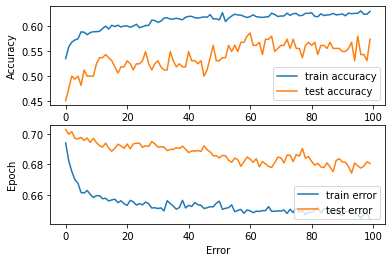

In [45]:
plot_history(mdl_history.history)

In [46]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predict)

Text(0, 0.5, 'True Positive & False Positive Rates')

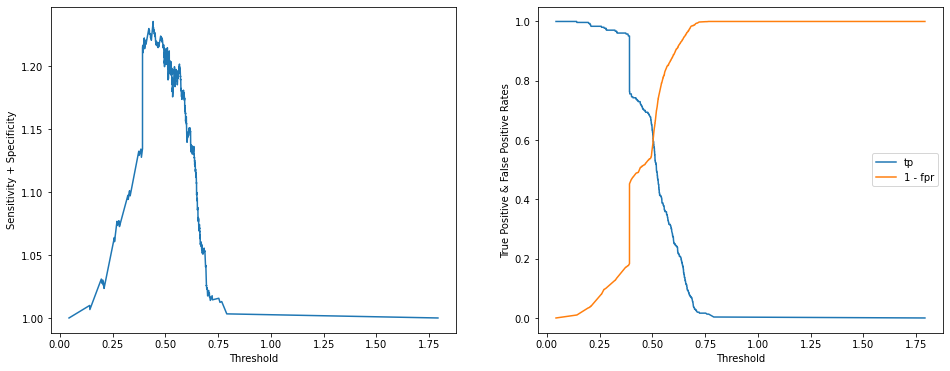

In [47]:

# Plotting the threshold for TP and FP rates 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

ax[0].plot(threshold, tpr + (1 - fpr))
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Sensitivity + Specificity')

ax[1].plot(threshold, tpr, label="tp")
ax[1].plot(threshold, 1 - fpr, label="1 - fpr")
ax[1].legend()
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('True Positive & False Positive Rates')


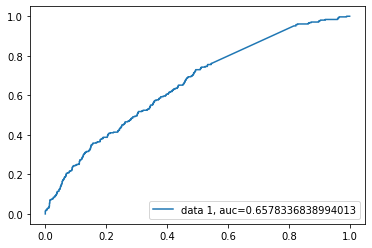

In [48]:
auc = roc_auc_score(y_test, y_pred_probs)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [62]:

# Identify the optimal threshold for the model
# optimal threshold is when true positive rate is high and false positive rate is low.
fn = tpr + (1 - fpr)
index = np.argmax(fn)

optimal_threshold = threshold[index]
print('optimal threshold:', optimal_threshold)


optimal threshold: 0.44245848


[[0.47414854]
 [0.5011696 ]
 [0.5282633 ]
 ...
 [0.55745727]
 [0.39196375]
 [0.5521166 ]]


(0.0, 2.0, 2.0, 0.0)

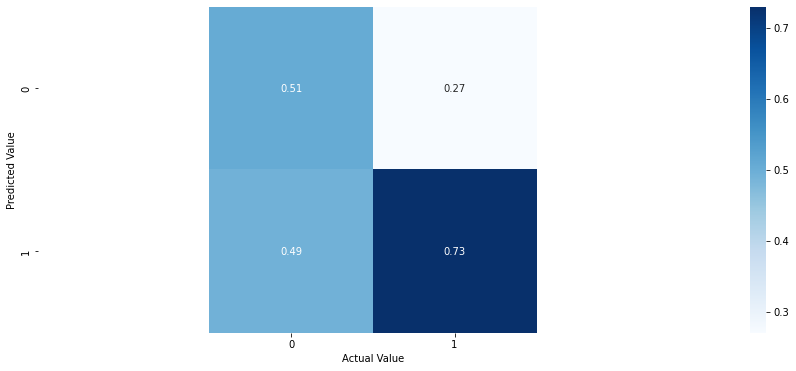

In [63]:
# Plotting the confusion matrix for the optimal threshold
predict = model.predict(X_test)
print(predict)
predict = np.where(predict >= optimal_threshold, 1, 0)
#predict = np.round(predict)


fig, axes = plt.subplots(figsize=(15,6))

cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')


In [51]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      0.51      0.65      1609
           1       0.22      0.73      0.34       307

    accuracy                           0.54      1916
   macro avg       0.56      0.62      0.49      1916
weighted avg       0.80      0.54      0.60      1916



In [52]:
# Notice that the precison and recall for minority class(1) has improved after over-sampling.
# In the original unbalanced dataset, the precision and recall were very low around 0.01. 
# Now, after adding over sampling, the precision and recall for minority class has improved.

print(confusion_matrix(y_test,predict))

[[814 795]
 [ 83 224]]
